<h1><center>HW 3: Build Twitter Networks</center></h1>

### Q1. Scrape the follower-followee network by companies. (5 points)
    * Define a function to retrieve the follower-followee network of a list of twenty accounts of U.S. FT companies. 
    * The input will be a list of Twitter screen names. 
    * The output will be a dataframe with this list of accounts as row index and column index, and 1 and 0 as values.
    * Note: this will take some time because Twitter API will force you to sleep. 


In [19]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import re
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import tweepy as tw
import datetime
import time
import os

In [144]:
CONSUMER_KEY='lWJxXIkD0gFEo2QuuzJJfmZYs'
CONSUMER_SECRET='WppoUlimFfz1EnZR4BEzn2WaOVSZ4d9kYhf775wNiHdWjtH80M'
ACCESS_KEY='1450273342846558214-ksByl712nidMpUDCe6rakC1PDGg02E'
ACCESS_SECRET='4EjeUZfczqVIksI4UKg6Ltxc6SeFhQ1THdZS6adwkJVKu'


def get_follow(accounts):
    auth = tw.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
    api = tw.API(auth, wait_on_rate_limit=True)
    ntwrk = pd.DataFrame(index = accounts, columns = accounts)
    
    row_count=0
    for index_num in range(len(accounts)):
        for col_num in range(len(accounts)):
            if index_num == col_num:
                #get friendship returns null for followed_by and following for same source and target, manually putting 0 for avoiding rate limit reached
                ntwrk.at[accounts[index_num], accounts[col_num]] = 0
                continue
            else:
                if(col_num>row_count):
                    #get friendship data
                    friendship = api.get_friendship(source_screen_name = accounts[index_num], target_screen_name = accounts[col_num])
                    src_following = int(friendship[0].following)#source following
                    src_followed_by = int(friendship[0].followed_by)#source followed_by
                else:
                    #skip cells in which data is already filled
                    continue
            ntwrk.at[accounts[index_num], accounts[col_num]] = src_followed_by
            ntwrk.at[accounts[col_num], accounts[index_num]] = src_following
        row_count+=1

    return ntwrk

In [145]:
# test the function with the list of accounts

accounts=['walmart',
 'tysonfoods',
 'godaddy',
 'republicservice',
 'firstsolar',
 'taylor_morrison',
 'onsemi',
 'fm_fcx',
 'amkortechnology',
 'magellanhealth',
 'edwardslifesci',
 'visa',
 'cbre',
 'smartfinal',
 'google',
 'waltdisneyco',
 'atvi_ab',
 'ebay',
 'intuit',
 'edisonintl']

df = get_follow(accounts)
df

Rate limit reached. Sleeping for: 868


,walmart,tysonfoods,godaddy,republicservice,firstsolar,taylor_morrison,onsemi,fm_fcx,amkortechnology,magellanhealth,edwardslifesci,visa,cbre,smartfinal,google,waltdisneyco,atvi_ab,ebay,intuit,edisonintl
walmart,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tysonfoods,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
godaddy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
republicservice,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
firstsolar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
taylor_morrison,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
onsemi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
fm_fcx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
amkortechnology,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
magellanhealth,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Q2. Build a directed network with the data you just scraped. (5 points)
    * Bulid a network and visualize it. Hint: you can use "nx.convert_matrix.from_pandas_adjacency".
    * Calculate the indegree centrality and structural hole (you can use constraint). 
    * Sort these nodes by indegree centrality and print the top one account.
    * Sort these nodes by structural hole and print the top one account. 
    * Note the NA values in constraint measures. Also note the relation between structural hole and constraint.

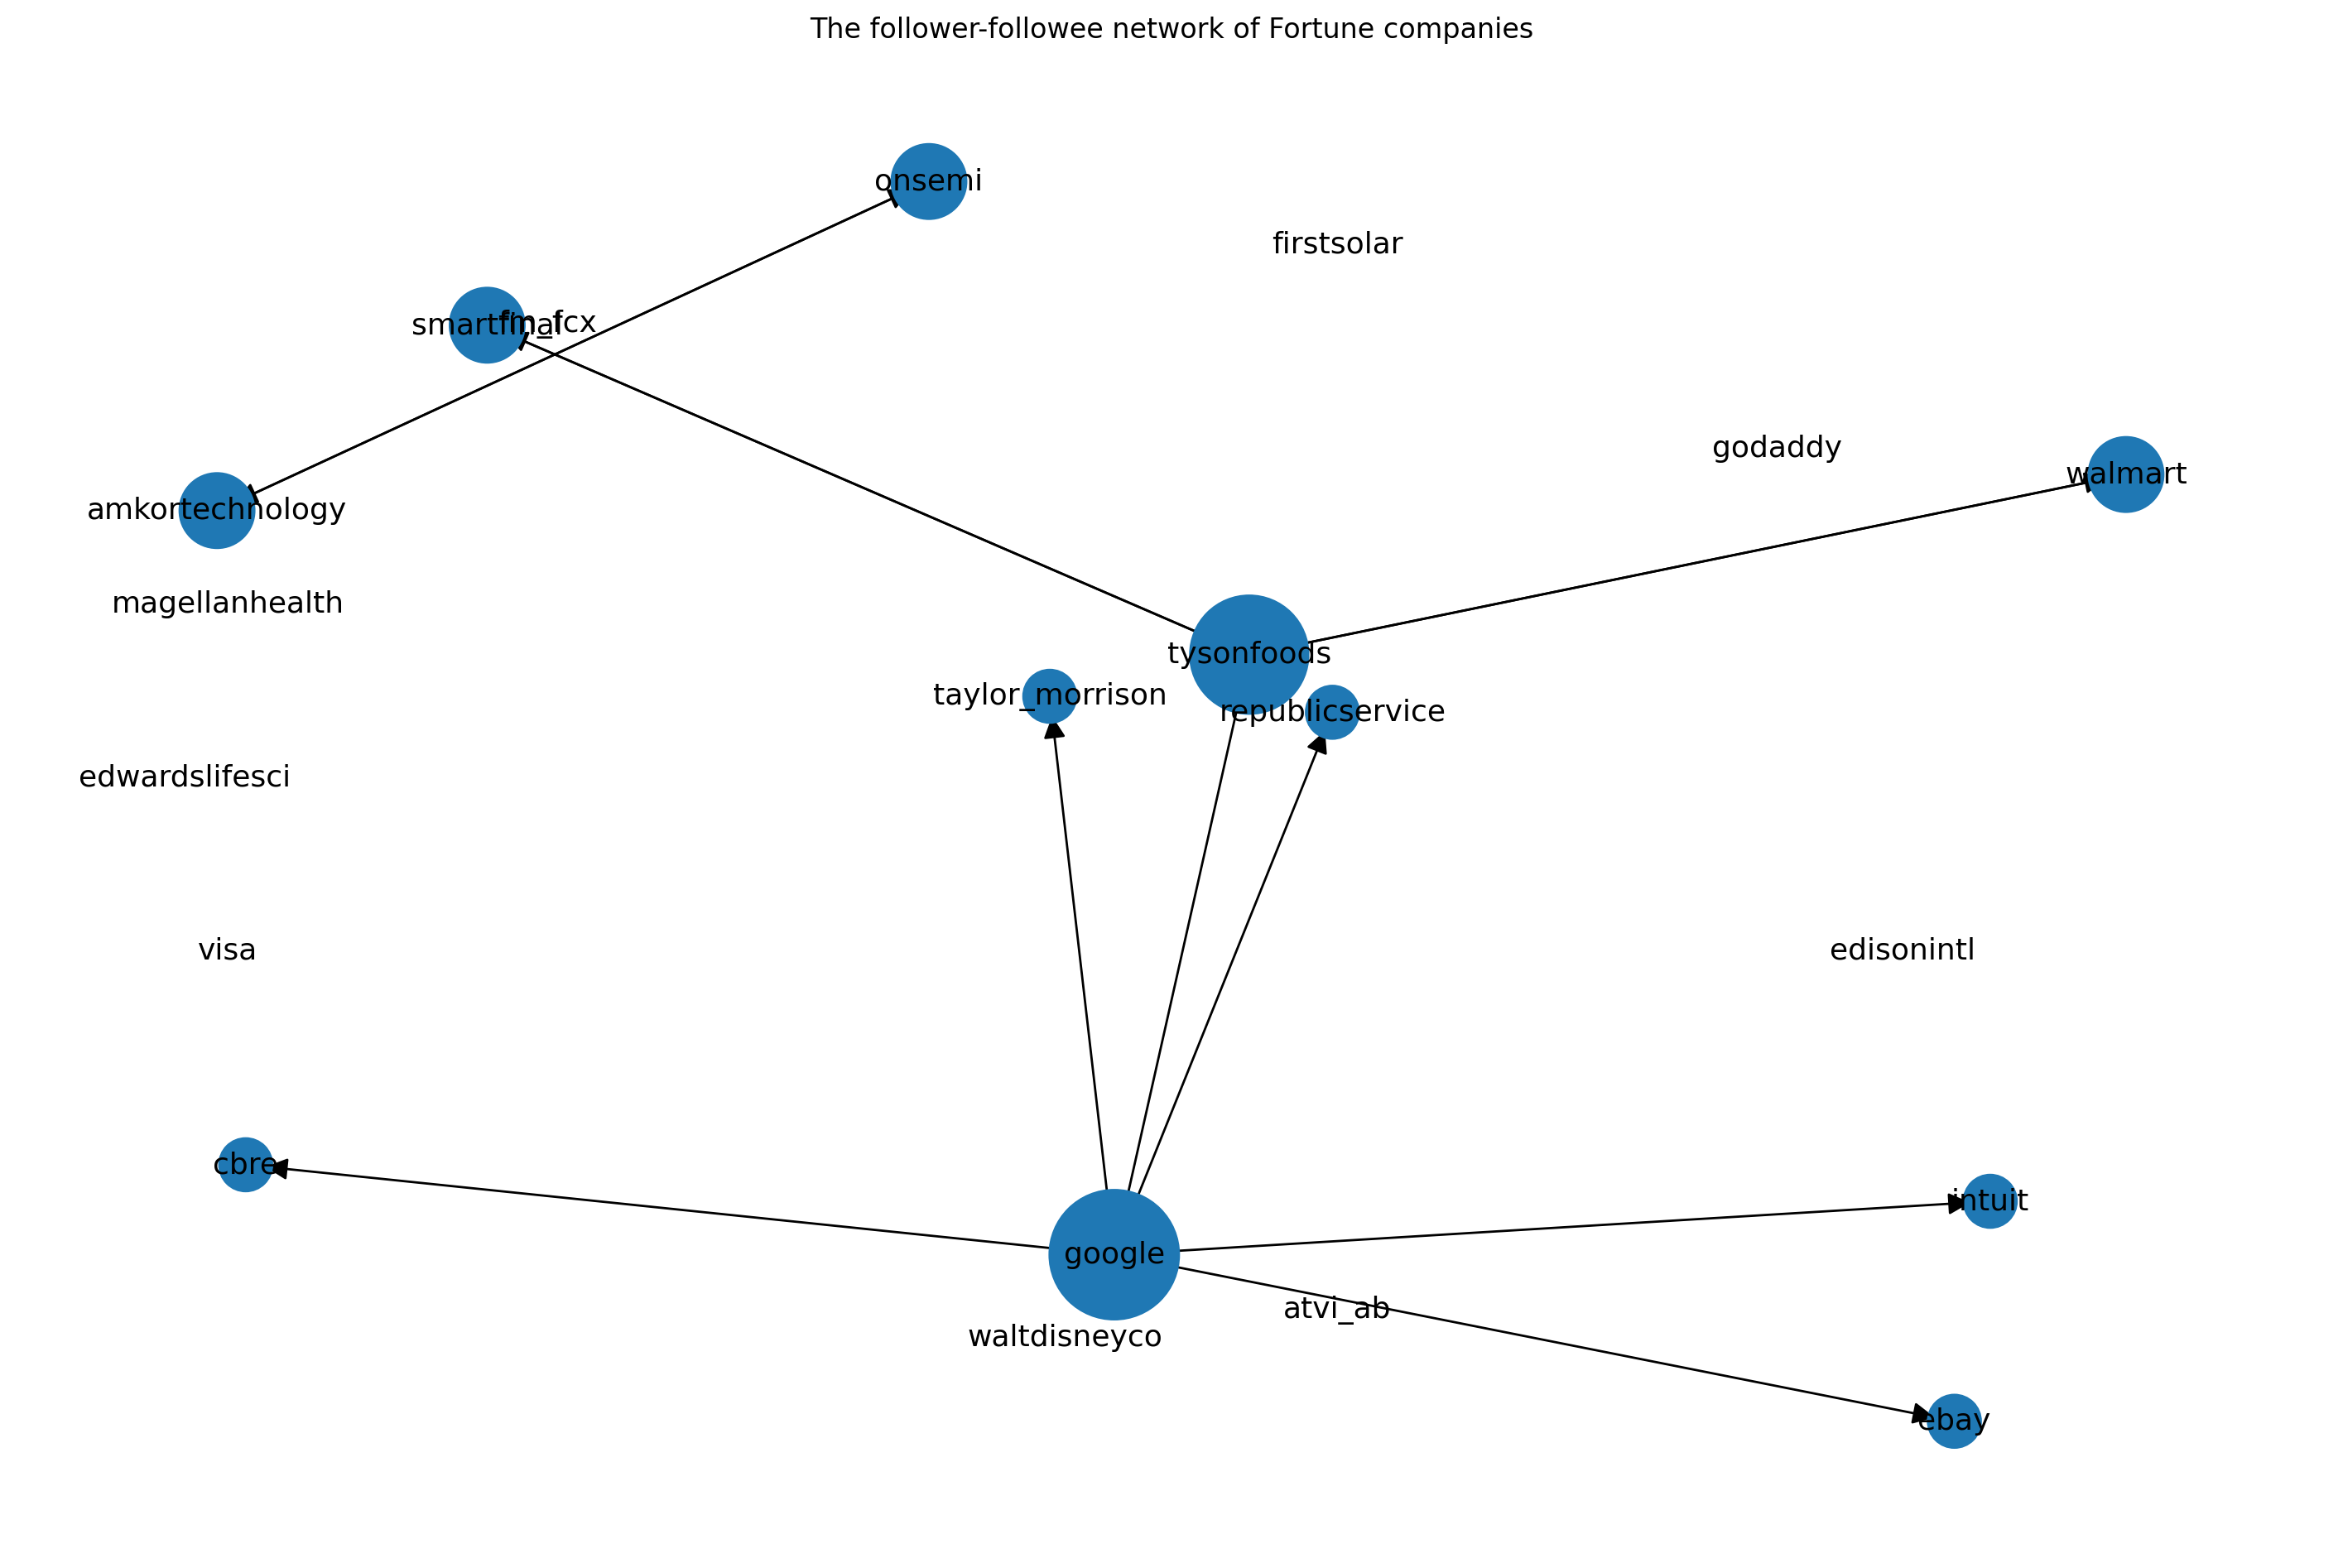

In [157]:
# Build a network from the adjacency matrix
dir_net_grph = nx.convert_matrix.from_pandas_adjacency(df.astype(bool),create_using=nx.DiGraph)

# Take a look
fig = figure(figsize=(18, 12), dpi=200)
pos = nx.kamada_kawai_layout(dir_net_grph)
nodes = nx.draw_networkx_nodes(dir_net_grph,pos,node_size=[x * 10000 for x in nx.degree_centrality(dir_net_grph).values()])
edges = nx.draw_networkx_edges(dir_net_grph,pos,edgelist=dir_net_grph.edges(),arrows= True,arrowsize=20 ,edge_color='black')
lables = nx.draw_networkx_labels(dir_net_grph,pos,font_size=13)

# Visualize
title = plt.title('The follower-followee network of Fortune companies')
axis = plt.axis("off")
plt.show()

In [170]:
# calculate Indegree Centrality and structural hole
indegree_centralities = nx.in_degree_centrality(dir_net_grph)
constraints = nx.constraint(dir_net_grph)#lack of structural hole
# effective_size = nx.effective_size(dir_net_grph)#measures structural hole

# Sort nodes by Indegree Centrality
sorted_by_idc = sorted(indegree_centralities.items(), key=lambda x: x[1], reverse=True)

# Sort nodes by structural hole
constraints_without_nan = {k: constraints[k] for k in constraints if not np.isnan(constraints[k])}
sorted_by_struct_hole = sorted(constraints_without_nan.items(), key=lambda x: x[1], reverse=False)

# print top one accounts
print("Top account by Indegree Centrality: " , sorted_by_idc[0])
print("Top account by Constraints: " , sorted_by_struct_hole[0])

# note NA values for constraint measures
nan_values = {k: constraints[k] for k in constraints if np.isnan(constraints[k])}

# constraint measures the lack of structural holes
print(constraints_without_nan)

Top account by Indegree Centrality:  ('tysonfoods', 0.15789473684210525)
Top account by Constraints:  ('google', 0.16666666666666669)
{'walmart': 1.0, 'tysonfoods': 0.3600000000000001, 'onsemi': 1.0, 'amkortechnology': 1.0, 'smartfinal': 1.0, 'google': 0.16666666666666669}


### Bonus question: (3 points)
 * Define a functionn to scrape the most recent (the recent week, but you can go beyond a bit if in one call you get a few) **original tweets** (exclude retweets) from multiple accouts. This function will take a list of screen names as input.
 * For each tweet, grab "id","created_at","full_text","user.screen_name".
 * Make a dataframe and return the dataframe.
 * Use the function to get the original tweets of the top twp accounts from Q2. 


In [214]:
users = ['tysonfoods','google']

def get_all_tweets(user_names):
    auth = tw.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
    api = tw.API(auth, wait_on_rate_limit=True)
    tweets_list=list()
    try:
        for user_name in user_names:
            count = 110
            # Creation of query method using parameters
            tweets = tw.Cursor(api.user_timeline,screen_name=user_name).items(count)
            # Pulling information from tweets iterable object
            tweets_user = [[tweet.id, tweet.created_at,  tweet.text, tweet.user.screen_name] for tweet in tweets if not tweet.retweeted]
            tweets_list.extend(tweets_user)

        # Creation of dataframe from tweets list
        tweets_df = pd.DataFrame(tweets_list,columns = ['id', 'created_at', 'full_text', 'user screen_name'])
        return tweets_df
    except BaseException as e:
        print('failed on_status,',str(e))
        time.sleep(3)        

    
    


if __name__ == '__main__':
    get_all_tweets(users) 

,id,created_at,full_text,user screen_name
0,1447573737092567047,2021-10-11 14:44:08+00:00,@ohthatsmita Hi – Thank you for bringing this ...,TysonFoods
1,1447573643828019200,2021-10-11 14:43:45+00:00,@mekiyacrowe Hi – Thank you for bringing this ...,TysonFoods
2,1447573486889746432,2021-10-11 14:43:08+00:00,@Jayydollxo Hi – Thank you for bringing this t...,TysonFoods
3,1445825464832954370,2021-10-06 18:57:07+00:00,@matevirginia Hi – Thank you for your note! Pl...,TysonFoods
4,1443237794370015237,2021-09-29 15:34:38+00:00,@Michalsassy1 @TysonBrand Hi Michal. Please re...,TysonFoods
...,...,...,...,...
215,1450494992477270019,2021-10-19 16:12:09+00:00,"@AulaRegalis Hi there. Just to confirm, have y...",Google
216,1450494535981744132,2021-10-19 16:10:20+00:00,@Joeterseeer Hi Joe. Have you already tried re...,Google
217,1450493825919688712,2021-10-19 16:07:31+00:00,@godl9069 Hi there. We'd like to move this con...,Google
218,1450493707262824455,2021-10-19 16:07:03+00:00,@PastNormal_Game Hi there. You can skip that s...,Google
